In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [2]:
fid = h5py.File('validation.h5','r')

In [3]:
list(fid.keys())

['label', 'sen1', 'sen2']

In [4]:
img,label = np.array(fid['sen2']),np.array(fid['label'])

In [5]:
img.shape,label.shape

((24119, 32, 32, 10), (24119, 17))

In [6]:
img,label

(array([[[[0.1171, 0.0902, 0.067 , ..., 0.0509, 0.0306, 0.0224],
          [0.1166, 0.0899, 0.0655, ..., 0.049 , 0.0273, 0.0193],
          [0.117 , 0.0896, 0.0645, ..., 0.049 , 0.0273, 0.0193],
          ...,
          [0.1183, 0.0914, 0.0673, ..., 0.0508, 0.0281, 0.0203],
          [0.1183, 0.0909, 0.068 , ..., 0.0508, 0.0281, 0.0203],
          [0.1188, 0.0906, 0.0676, ..., 0.049 , 0.0273, 0.0202]],
 
         [[0.1184, 0.0916, 0.0674, ..., 0.0484, 0.0303, 0.0205],
          [0.1168, 0.0912, 0.0668, ..., 0.0524, 0.0296, 0.0211],
          [0.1174, 0.0907, 0.0665, ..., 0.0524, 0.0296, 0.0211],
          ...,
          [0.117 , 0.09  , 0.0657, ..., 0.0482, 0.0254, 0.0184],
          [0.118 , 0.0912, 0.0668, ..., 0.0482, 0.0254, 0.0184],
          [0.1179, 0.0917, 0.0664, ..., 0.0459, 0.0236, 0.0168]],
 
         [[0.1186, 0.0913, 0.0677, ..., 0.0484, 0.0303, 0.0205],
          [0.1189, 0.0911, 0.0681, ..., 0.0524, 0.0296, 0.0211],
          [0.1181, 0.0915, 0.0673, ..., 0.0524, 0.0296

In [7]:
np.amax(img),np.amin(img)

(2.8005, 0.0001)

In [8]:
np.amax(label),np.amin(label)

(1.0, 0.0)

In [9]:
img = (img - np.amin(img))/(np.amax(img)-np.amin(img))

In [10]:
np.amax(img),np.amin(img)

(1.0, 0.0)

In [11]:
img_RGB = img[:,:,:,[0,1,2]]

In [12]:
img_RGBN = img[:,:,:,[0,1,2,6]]

In [13]:
#split dataset
X_train, X_valid, y_train, y_valid = train_test_split(img, label, test_size=0.2)

X_train_RGB, X_valid_RGB, y_train_RGB, y_valid_RGB = train_test_split(img_RGB, label, test_size=0.2)

X_train_RGBN, X_valid_RGBN, y_train_RGBN, y_valid_RGBN = train_test_split(img_RGBN, label, test_size=0.2)

In [14]:
# convert np array to tensor
X_train = tf.convert_to_tensor(X_train, np.float32)
y_train = tf.convert_to_tensor(y_train, np.int32)
X_valid = tf.convert_to_tensor(X_valid, np.float32)
y_valid = tf.convert_to_tensor(y_valid, np.int32)

X_train_RGB = tf.convert_to_tensor(X_train_RGB, np.float32)
y_train_RGB = tf.convert_to_tensor(y_train_RGB, np.int32)
X_valid_RGB = tf.convert_to_tensor(X_valid_RGB, np.float32)
y_valid_RGB = tf.convert_to_tensor(y_valid_RGB, np.int32)

X_train_RGBN = tf.convert_to_tensor(X_train_RGBN, np.float32)
y_train_RGBN = tf.convert_to_tensor(y_train_RGBN, np.int32)
X_valid_RGBN = tf.convert_to_tensor(X_valid_RGBN, np.float32)
y_valid_RGBN = tf.convert_to_tensor(y_valid_RGBN, np.int32)

In [15]:
X_train,X_train_RGB,X_train_RGBN

(<tf.Tensor 'Const:0' shape=(19295, 32, 32, 10) dtype=float32>,
 <tf.Tensor 'Const_4:0' shape=(19295, 32, 32, 3) dtype=float32>,
 <tf.Tensor 'Const_8:0' shape=(19295, 32, 32, 4) dtype=float32>)

In [16]:
BUFFER_SIZE = 19295
BATCH_SIZE = 128

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_RGB, y_train_RGB)).shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [18]:
X_valid_RGB,y_valid_RGB

(<tf.Tensor 'Const_6:0' shape=(4824, 32, 32, 3) dtype=float32>,
 <tf.Tensor 'Const_7:0' shape=(4824, 17) dtype=int32>)

In [30]:
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid_RGB, y_valid_RGB)).repeat().batch(BATCH_SIZE)

In [20]:
train_dataset,valid_dataset

(<DatasetV1Adapter shapes: ((?, 32, 32, 3), (?, 17)), types: (tf.float32, tf.int32)>,
 <DatasetV1Adapter shapes: ((?, 32, 32, 3), (?, 17)), types: (tf.float32, tf.int32)>)

In [21]:
from keras import optimizers
from keras import layers

Using TensorFlow backend.


In [22]:
RGB_model = tf.keras.Sequential()
RGB_model.add(tf.keras.layers.Conv2D(16, (1,1), activation='relu', input_shape=(32,32,3)))
RGB_model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
RGB_model.add(tf.keras.layers.MaxPooling2D((2,2)))
RGB_model.add(tf.keras.layers.Conv2D(32, (1,1), activation='relu'))
RGB_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
RGB_model.add(tf.keras.layers.MaxPooling2D((2,2)))
RGB_model.add(tf.keras.layers.Conv2D(64, (1,1), activation='relu'))
RGB_model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))

RGB_model.add(tf.keras.layers.Flatten())
RGB_model.add(tf.keras.layers.Dense(64, activation='relu'))
RGB_model.add(tf.keras.layers.Dense(17, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [23]:
RGB_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)        1056      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          4160      
__________

In [36]:
RGB_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
history = RGB_model.fit(train_dataset, epochs=100, steps_per_epoch=150,validation_data=valid_dataset,validation_steps=32)

Epoch 1/100
150/150 [==============================] - 9s 62ms/step - loss: 0.5223 - acc: 0.8236 - val_loss: 0.7961 - val_acc: 0.7529
Epoch 2/100
150/150 [==============================] - 1s 9ms/step - loss: 0.4846 - acc: 0.8303 - val_loss: 0.7988 - val_acc: 0.7529
Epoch 3/100
150/150 [==============================] - 1s 9ms/step - loss: 0.4763 - acc: 0.8322 - val_loss: 0.7924 - val_acc: 0.7490
Epoch 4/100
150/150 [==============================] - 1s 9ms/step - loss: 0.4586 - acc: 0.8401 - val_loss: 0.7662 - val_acc: 0.7671
Epoch 5/100
150/150 [==============================] - 1s 9ms/step - loss: 0.4716 - acc: 0.8353 - val_loss: 0.8752 - val_acc: 0.7393
Epoch 6/100
150/150 [==============================] - 1s 9ms/step - loss: 0.4587 - acc: 0.8390 - val_loss: 0.7796 - val_acc: 0.7578
Epoch 7/100
150/150 [==============================] - 1s 9ms/step - loss: 0.4228 - acc: 0.8520 - val_loss: 0.8997 - val_acc: 0.7378
Epoch 8/100
150/150 [==============================] - 1s 9ms/step -

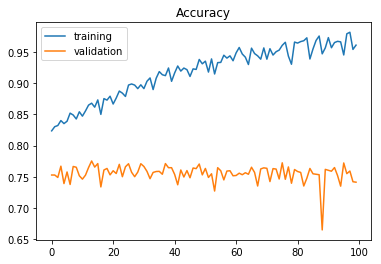

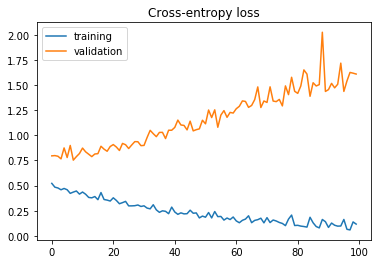

In [38]:
def plot_accuracies_and_losses(history):
    plt.title('Accuracy')
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    
    plt.title('Cross-entropy loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

plot_accuracies_and_losses(history)

In [50]:
RGB_model_3 = tf.keras.Sequential()
RGB_model_3.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)))
RGB_model_3.add(tf.keras.layers.MaxPooling2D((2,2)))
RGB_model_3.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
RGB_model_3.add(tf.keras.layers.MaxPooling2D((2,2)))
RGB_model_3.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))

RGB_model_3.add(tf.keras.layers.Flatten())
RGB_model_3.add(tf.keras.layers.Dense(64, activation='relu'))
RGB_model_3.add(tf.keras.layers.Dense(17, activation='softmax'))
RGB_model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                65600     
__________

In [45]:
RGB_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
history_3 = RGB_model_3.fit(train_dataset, epochs=200, steps_per_epoch=150,validation_data=valid_dataset,validation_steps=32)

Epoch 1/200
150/150 [==============================] - 9s 57ms/step - loss: 0.5816 - acc: 0.8061 - val_loss: 0.8265 - val_acc: 0.7385
Epoch 2/200
150/150 [==============================] - 1s 5ms/step - loss: 0.5384 - acc: 0.8156 - val_loss: 0.8287 - val_acc: 0.7454
Epoch 3/200
150/150 [==============================] - 1s 5ms/step - loss: 0.5447 - acc: 0.8139 - val_loss: 0.7825 - val_acc: 0.7534
Epoch 4/200
150/150 [==============================] - 1s 5ms/step - loss: 0.5328 - acc: 0.8193 - val_loss: 0.8240 - val_acc: 0.7556
Epoch 5/200
150/150 [==============================] - 1s 5ms/step - loss: 0.5462 - acc: 0.8165 - val_loss: 0.8278 - val_acc: 0.7434
Epoch 6/200
150/150 [==============================] - 1s 5ms/step - loss: 0.5218 - acc: 0.8183 - val_loss: 0.7966 - val_acc: 0.7649
Epoch 7/200
150/150 [==============================] - 1s 5ms/step - loss: 0.5221 - acc: 0.8235 - val_loss: 0.7786 - val_acc: 0.7625
Epoch 8/200
150/150 [==============================] - 1s 5ms/step -

150/150 [==============================] - 1s 5ms/step - loss: 0.2198 - acc: 0.9252 - val_loss: 1.1299 - val_acc: 0.7544
Epoch 124/200
150/150 [==============================] - 1s 5ms/step - loss: 0.2282 - acc: 0.9209 - val_loss: 1.1569 - val_acc: 0.7529
Epoch 125/200
150/150 [==============================] - 1s 5ms/step - loss: 0.2107 - acc: 0.9301 - val_loss: 1.1976 - val_acc: 0.7434
Epoch 126/200
150/150 [==============================] - 1s 5ms/step - loss: 0.2293 - acc: 0.9223 - val_loss: 1.1792 - val_acc: 0.7546
Epoch 127/200
150/150 [==============================] - 1s 5ms/step - loss: 0.2260 - acc: 0.9226 - val_loss: 1.2069 - val_acc: 0.7537
Epoch 128/200
150/150 [==============================] - 1s 5ms/step - loss: 0.2094 - acc: 0.9283 - val_loss: 1.1328 - val_acc: 0.7668
Epoch 129/200
150/150 [==============================] - 1s 5ms/step - loss: 0.1977 - acc: 0.9349 - val_loss: 1.1248 - val_acc: 0.7612
Epoch 130/200
150/150 [==============================] - 1s 5ms/step 

Epoch 184/200
150/150 [==============================] - 1s 5ms/step - loss: 0.1219 - acc: 0.9608 - val_loss: 1.4610 - val_acc: 0.7446
Epoch 185/200
150/150 [==============================] - 1s 5ms/step - loss: 0.1553 - acc: 0.9474 - val_loss: 1.4549 - val_acc: 0.7515
Epoch 186/200
150/150 [==============================] - 1s 5ms/step - loss: 0.1205 - acc: 0.9610 - val_loss: 1.4496 - val_acc: 0.7507
Epoch 187/200
150/150 [==============================] - 1s 5ms/step - loss: 0.1340 - acc: 0.9558 - val_loss: 1.4866 - val_acc: 0.7439
Epoch 188/200
150/150 [==============================] - 1s 5ms/step - loss: 0.1130 - acc: 0.9632 - val_loss: 1.5557 - val_acc: 0.7356
Epoch 189/200
150/150 [==============================] - 1s 5ms/step - loss: 0.1552 - acc: 0.9461 - val_loss: 1.4861 - val_acc: 0.7461
Epoch 190/200
150/150 [==============================] - 1s 5ms/step - loss: 0.1430 - acc: 0.9499 - val_loss: 1.5282 - val_acc: 0.7410
Epoch 191/200
150/150 [==============================] 

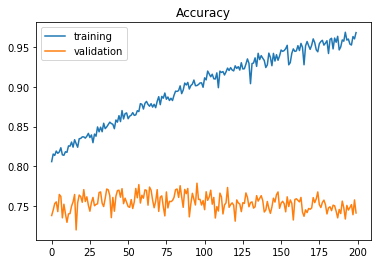

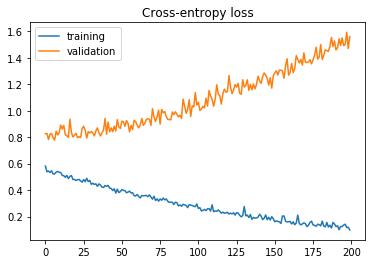

In [46]:
plot_accuracies_and_losses(history_3)

In [47]:
list(history.history)

['loss', 'acc', 'val_loss', 'val_acc']

In [48]:
from keras.regularizers import l2

In [58]:
# simple model with l2 normolization
RGB_model_3_l2 = tf.keras.Sequential()
RGB_model_3_l2.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3), kernel_regularizer = l2(0.01)))
RGB_model_3_l2.add(tf.keras.layers.MaxPooling2D((2,2)))
RGB_model_3_l2.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer = l2(0.01)))
RGB_model_3_l2.add(tf.keras.layers.MaxPooling2D((2,2)))
RGB_model_3_l2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer = l2(0.01)))

RGB_model_3_l2.add(tf.keras.layers.Flatten())
RGB_model_3_l2.add(tf.keras.layers.Dense(64, activation='relu'))
RGB_model_3_l2.add(tf.keras.layers.Dense(17, activation='softmax'))
RGB_model_3_l2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                65600     
__________

In [59]:
RGB_model_3_l2.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
history_3_l2 = RGB_model_3_l2.fit(train_dataset, epochs=250, steps_per_epoch=100,validation_data=valid_dataset,validation_steps=32)

Epoch 1/250
100/100 [==============================] - 9s 86ms/step - loss: 2.6944 - acc: 0.1984 - val_loss: 2.1770 - val_acc: 0.2886
Epoch 2/250
100/100 [==============================] - 1s 6ms/step - loss: 2.1397 - acc: 0.2940 - val_loss: 2.0954 - val_acc: 0.3040
Epoch 3/250
100/100 [==============================] - 1s 6ms/step - loss: 2.0859 - acc: 0.2970 - val_loss: 2.0517 - val_acc: 0.3152
Epoch 4/250
100/100 [==============================] - 1s 6ms/step - loss: 2.0570 - acc: 0.2969 - val_loss: 2.0352 - val_acc: 0.3225
Epoch 5/250
100/100 [==============================] - 1s 6ms/step - loss: 2.0602 - acc: 0.3052 - val_loss: 2.0349 - val_acc: 0.3201
Epoch 6/250
100/100 [==============================] - 1s 6ms/step - loss: 2.0329 - acc: 0.3072 - val_loss: 2.0470 - val_acc: 0.3037
Epoch 7/250
100/100 [==============================] - 1s 6ms/step - loss: 2.0277 - acc: 0.3045 - val_loss: 2.0135 - val_acc: 0.3162
Epoch 8/250
100/100 [==============================] - 1s 6ms/step -

100/100 [==============================] - 1s 6ms/step - loss: 1.1575 - acc: 0.6540 - val_loss: 1.1862 - val_acc: 0.6531
Epoch 124/250
100/100 [==============================] - 1s 6ms/step - loss: 1.1679 - acc: 0.6512 - val_loss: 1.1631 - val_acc: 0.6611
Epoch 125/250
100/100 [==============================] - 1s 6ms/step - loss: 1.1446 - acc: 0.6632 - val_loss: 1.2124 - val_acc: 0.6321
Epoch 126/250
100/100 [==============================] - 1s 6ms/step - loss: 1.1671 - acc: 0.6542 - val_loss: 1.1586 - val_acc: 0.6611
Epoch 127/250
100/100 [==============================] - 1s 6ms/step - loss: 1.1280 - acc: 0.6654 - val_loss: 1.1898 - val_acc: 0.6572
Epoch 128/250
100/100 [==============================] - 1s 6ms/step - loss: 1.1573 - acc: 0.6543 - val_loss: 1.1709 - val_acc: 0.6541
Epoch 129/250
100/100 [==============================] - 1s 6ms/step - loss: 1.1502 - acc: 0.6552 - val_loss: 1.1283 - val_acc: 0.6731
Epoch 130/250
100/100 [==============================] - 1s 6ms/step 

Epoch 184/250
100/100 [==============================] - 1s 6ms/step - loss: 1.0900 - acc: 0.6788 - val_loss: 1.1392 - val_acc: 0.6733
Epoch 185/250
100/100 [==============================] - 1s 6ms/step - loss: 1.0989 - acc: 0.6761 - val_loss: 1.2638 - val_acc: 0.6235
Epoch 186/250
100/100 [==============================] - 1s 6ms/step - loss: 1.0979 - acc: 0.6756 - val_loss: 1.1894 - val_acc: 0.6487
Epoch 187/250
100/100 [==============================] - 1s 6ms/step - loss: 1.0838 - acc: 0.6751 - val_loss: 1.1688 - val_acc: 0.6558
Epoch 188/250
100/100 [==============================] - 1s 6ms/step - loss: 1.0888 - acc: 0.6767 - val_loss: 1.1502 - val_acc: 0.6562
Epoch 189/250
100/100 [==============================] - 1s 6ms/step - loss: 1.0987 - acc: 0.6726 - val_loss: 1.0857 - val_acc: 0.6780
Epoch 190/250
100/100 [==============================] - 1s 6ms/step - loss: 1.0667 - acc: 0.6837 - val_loss: 1.1031 - val_acc: 0.6794
Epoch 191/250
100/100 [==============================] 

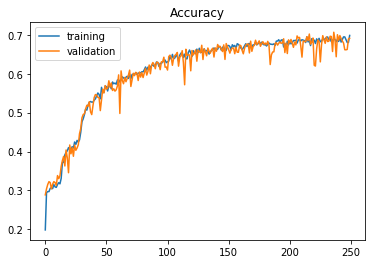

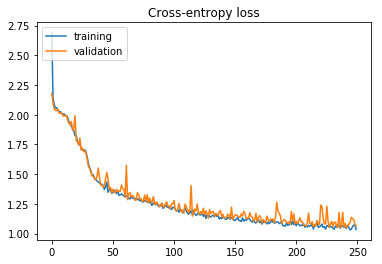

In [60]:
plot_accuracies_and_losses(history_3_l2)

In [64]:
RGB_model_6_l2 = tf.keras.Sequential()
RGB_model_6_l2.add(tf.keras.layers.Conv2D(16, (1,1), activation='relu', input_shape=(32,32,3)))
RGB_model_6_l2.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer = l2(0.01)))
RGB_model_6_l2.add(tf.keras.layers.MaxPooling2D((2,2)))
RGB_model_6_l2.add(tf.keras.layers.Conv2D(32, (1,1), activation='relu'))
RGB_model_6_l2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer = l2(0.01)))
RGB_model_6_l2.add(tf.keras.layers.MaxPooling2D((2,2)))
RGB_model_6_l2.add(tf.keras.layers.Conv2D(64, (1,1), activation='relu'))
RGB_model_6_l2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer = l2(0.01)))

RGB_model_6_l2.add(tf.keras.layers.Flatten())
RGB_model_6_l2.add(tf.keras.layers.Dense(64, activation='relu'))
RGB_model_6_l2.add(tf.keras.layers.Dense(17, activation='softmax'))
RGB_model_6_l2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 32)        1056      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 6, 6, 64)          4160      
__________

In [65]:
RGB_model_6_l2.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])
history_6_l2 = RGB_model_6_l2.fit(train_dataset, epochs=250, steps_per_epoch=100,validation_data=valid_dataset,validation_steps=32)

Epoch 1/250
100/100 [==============================] - 9s 93ms/step - loss: 2.9639 - acc: 0.1384 - val_loss: 2.6287 - val_acc: 0.1453
Epoch 2/250
100/100 [==============================] - 1s 10ms/step - loss: 2.6123 - acc: 0.1406 - val_loss: 2.6059 - val_acc: 0.1445
Epoch 3/250
100/100 [==============================] - 1s 10ms/step - loss: 2.5695 - acc: 0.1574 - val_loss: 2.3318 - val_acc: 0.2429
Epoch 4/250
100/100 [==============================] - 1s 10ms/step - loss: 2.1483 - acc: 0.2897 - val_loss: 2.0407 - val_acc: 0.3125
Epoch 5/250
100/100 [==============================] - 1s 10ms/step - loss: 2.0488 - acc: 0.3097 - val_loss: 2.0416 - val_acc: 0.3137
Epoch 6/250
100/100 [==============================] - 1s 10ms/step - loss: 2.0350 - acc: 0.3059 - val_loss: 2.0201 - val_acc: 0.3103
Epoch 7/250
100/100 [==============================] - 1s 10ms/step - loss: 1.9996 - acc: 0.3126 - val_loss: 1.9710 - val_acc: 0.3198
Epoch 8/250
100/100 [==============================] - 1s 10ms

Epoch 62/250
100/100 [==============================] - 1s 10ms/step - loss: 1.2338 - acc: 0.6144 - val_loss: 1.2423 - val_acc: 0.6096
Epoch 63/250
100/100 [==============================] - 1s 10ms/step - loss: 1.2676 - acc: 0.6024 - val_loss: 1.2331 - val_acc: 0.6116
Epoch 64/250
100/100 [==============================] - 1s 10ms/step - loss: 1.2310 - acc: 0.6084 - val_loss: 1.2915 - val_acc: 0.6094
Epoch 65/250
100/100 [==============================] - 1s 10ms/step - loss: 1.2390 - acc: 0.6048 - val_loss: 1.2991 - val_acc: 0.5989
Epoch 66/250
100/100 [==============================] - 1s 10ms/step - loss: 1.2625 - acc: 0.6031 - val_loss: 1.2314 - val_acc: 0.6311
Epoch 67/250
100/100 [==============================] - 1s 10ms/step - loss: 1.2355 - acc: 0.6146 - val_loss: 1.2324 - val_acc: 0.6204
Epoch 68/250
100/100 [==============================] - 1s 10ms/step - loss: 1.2140 - acc: 0.6157 - val_loss: 1.2449 - val_acc: 0.6204
Epoch 69/250
100/100 [==============================] -

100/100 [==============================] - 1s 10ms/step - loss: 0.9740 - acc: 0.7104 - val_loss: 1.0258 - val_acc: 0.6902
Epoch 183/250
100/100 [==============================] - 1s 10ms/step - loss: 1.0359 - acc: 0.6861 - val_loss: 1.1123 - val_acc: 0.6555
Epoch 184/250
100/100 [==============================] - 1s 10ms/step - loss: 0.9942 - acc: 0.6972 - val_loss: 1.0166 - val_acc: 0.7039
Epoch 185/250
100/100 [==============================] - 1s 10ms/step - loss: 0.9879 - acc: 0.7048 - val_loss: 1.0048 - val_acc: 0.7041
Epoch 186/250
100/100 [==============================] - 1s 10ms/step - loss: 0.9873 - acc: 0.7073 - val_loss: 1.0424 - val_acc: 0.6831
Epoch 187/250
100/100 [==============================] - 1s 10ms/step - loss: 0.9948 - acc: 0.7019 - val_loss: 1.0265 - val_acc: 0.6917
Epoch 188/250
100/100 [==============================] - 1s 10ms/step - loss: 1.0323 - acc: 0.6888 - val_loss: 1.0569 - val_acc: 0.6833
Epoch 189/250
100/100 [==============================] - 1s 10

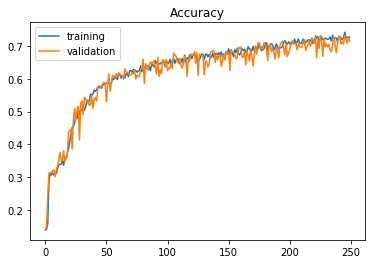

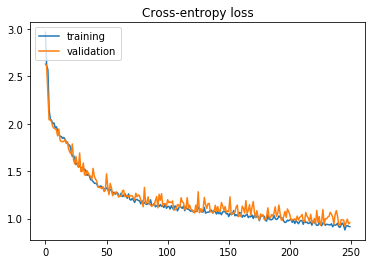

In [66]:
plot_accuracies_and_losses(history_6_l2)

In [67]:
train_dataset_RGBN = tf.data.Dataset.from_tensor_slices((X_train_RGBN, y_train_RGBN)).shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
valid_dataset_RGBN = tf.data.Dataset.from_tensor_slices((X_valid_RGBN, y_valid_RGBN)).repeat().batch(BATCH_SIZE)

In [97]:
RGBN_model_3_l2 = tf.keras.Sequential()
RGBN_model_3_l2.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,4), kernel_regularizer = l2(0.001)))
RGBN_model_3_l2.add(tf.keras.layers.MaxPooling2D((2,2)))
RGBN_model_3_l2.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer = l2(0.001)))
RGBN_model_3_l2.add(tf.keras.layers.MaxPooling2D((2,2)))
RGBN_model_3_l2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer = l2(0.001)))

RGBN_model_3_l2.add(tf.keras.layers.Flatten())
RGBN_model_3_l2.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = l2(0.001)))
RGBN_model_3_l2.add(tf.keras.layers.Dense(17, activation='softmax'))
RGBN_model_3_l2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 30, 30, 16)        592       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_18 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                65600     
__________

In [98]:
RGBN_model_3_l2.compile(loss = 'categorical_crossentropy', optimizer = adam , metrics = ['accuracy'])
history_3_l2_RGBN = RGBN_model_3_l2.fit(train_dataset_RGBN, epochs=250, steps_per_epoch=100,validation_data=valid_dataset_RGBN,validation_steps=32)

Epoch 1/250
100/100 [==============================] - 10s 96ms/step - loss: 2.4704 - acc: 0.2309 - val_loss: 2.0393 - val_acc: 0.3704
Epoch 2/250
100/100 [==============================] - 1s 7ms/step - loss: 1.9028 - acc: 0.3940 - val_loss: 1.8069 - val_acc: 0.4294
Epoch 3/250
100/100 [==============================] - 1s 7ms/step - loss: 1.7293 - acc: 0.4350 - val_loss: 1.6425 - val_acc: 0.4504
Epoch 4/250
100/100 [==============================] - 1s 7ms/step - loss: 1.6576 - acc: 0.4507 - val_loss: 1.6006 - val_acc: 0.4863
Epoch 5/250
100/100 [==============================] - 1s 7ms/step - loss: 1.6124 - acc: 0.4731 - val_loss: 1.5995 - val_acc: 0.4827
Epoch 6/250
100/100 [==============================] - 1s 7ms/step - loss: 1.5933 - acc: 0.4793 - val_loss: 1.5550 - val_acc: 0.4849
Epoch 7/250
100/100 [==============================] - 1s 7ms/step - loss: 1.5704 - acc: 0.4795 - val_loss: 1.5512 - val_acc: 0.4976
Epoch 8/250
100/100 [==============================] - 1s 7ms/step 

100/100 [==============================] - 1s 7ms/step - loss: 1.0320 - acc: 0.6940 - val_loss: 1.0709 - val_acc: 0.6753
Epoch 124/250
100/100 [==============================] - 1s 7ms/step - loss: 1.0483 - acc: 0.6865 - val_loss: 1.0604 - val_acc: 0.6829
Epoch 125/250
100/100 [==============================] - 1s 7ms/step - loss: 1.0342 - acc: 0.6969 - val_loss: 1.0696 - val_acc: 0.6782
Epoch 126/250
100/100 [==============================] - 1s 7ms/step - loss: 1.0370 - acc: 0.6925 - val_loss: 1.0629 - val_acc: 0.6917
Epoch 127/250
100/100 [==============================] - 1s 7ms/step - loss: 1.0418 - acc: 0.6934 - val_loss: 1.0636 - val_acc: 0.6833
Epoch 128/250
100/100 [==============================] - 1s 7ms/step - loss: 1.0385 - acc: 0.6924 - val_loss: 1.0720 - val_acc: 0.6838
Epoch 129/250
100/100 [==============================] - 1s 7ms/step - loss: 1.0257 - acc: 0.6983 - val_loss: 1.0597 - val_acc: 0.6772
Epoch 130/250
100/100 [==============================] - 1s 7ms/step 

Epoch 184/250
100/100 [==============================] - 1s 7ms/step - loss: 0.9655 - acc: 0.7248 - val_loss: 1.0441 - val_acc: 0.7026
Epoch 185/250
100/100 [==============================] - 1s 7ms/step - loss: 0.9685 - acc: 0.7218 - val_loss: 0.9872 - val_acc: 0.7114
Epoch 186/250
100/100 [==============================] - 1s 7ms/step - loss: 0.9685 - acc: 0.7162 - val_loss: 1.0115 - val_acc: 0.7002
Epoch 187/250
100/100 [==============================] - 1s 7ms/step - loss: 0.9541 - acc: 0.7302 - val_loss: 1.0000 - val_acc: 0.7078
Epoch 188/250
100/100 [==============================] - 1s 7ms/step - loss: 0.9683 - acc: 0.7194 - val_loss: 0.9848 - val_acc: 0.7134
Epoch 189/250
100/100 [==============================] - 1s 7ms/step - loss: 0.9521 - acc: 0.7262 - val_loss: 1.0046 - val_acc: 0.7002
Epoch 190/250
100/100 [==============================] - 1s 7ms/step - loss: 0.9698 - acc: 0.7191 - val_loss: 0.9932 - val_acc: 0.7139
Epoch 191/250
100/100 [==============================] 

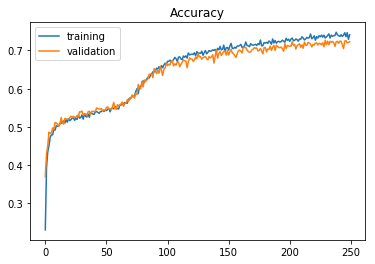

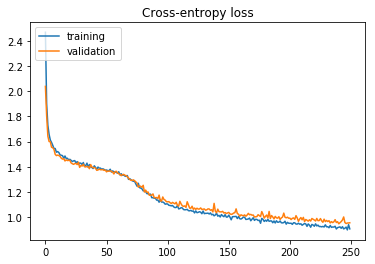

In [99]:
plot_accuracies_and_losses(history_3_l2_RGBN)

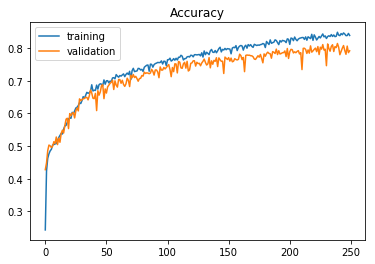

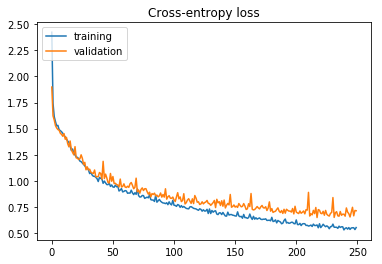

In [92]:
plot_accuracies_and_losses(history_3_l2_RGBN)

In [100]:
RGBN_model_6_l2 = tf.keras.Sequential()
RGBN_model_6_l2.add(tf.keras.layers.Conv2D(16, (1,1), activation='relu', input_shape=(32,32,4)))
RGBN_model_6_l2.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer = l2(0.001)))
RGBN_model_6_l2.add(tf.keras.layers.MaxPooling2D((2,2)))
RGBN_model_6_l2.add(tf.keras.layers.Conv2D(32, (1,1), activation='relu'))
RGBN_model_6_l2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer = l2(0.001)))
RGBN_model_6_l2.add(tf.keras.layers.MaxPooling2D((2,2)))
RGBN_model_6_l2.add(tf.keras.layers.Conv2D(64, (1,1), activation='relu'))
RGBN_model_6_l2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer = l2(0.001)))

RGBN_model_6_l2.add(tf.keras.layers.Flatten())
RGBN_model_6_l2.add(tf.keras.layers.Dense(64, activation='relu'))
RGBN_model_6_l2.add(tf.keras.layers.Dense(17, activation='softmax'))
RGBN_model_6_l2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 32, 32, 16)        80        
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 15, 15, 32)        1056      
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 6, 6, 64)          4160      
__________

In [101]:
adam = tf.keras.optimizers.Adam(lr=0.0002)
RGBN_model_6_l2.compile(loss = 'categorical_crossentropy', optimizer = adam , metrics = ['accuracy'])
history_6_l2_RGBN = RGBN_model_6_l2.fit(train_dataset_RGBN, epochs=250, steps_per_epoch=100,validation_data=valid_dataset_RGBN,validation_steps=32)

Epoch 1/250
100/100 [==============================] - 10s 99ms/step - loss: 2.7634 - acc: 0.1533 - val_loss: 2.5209 - val_acc: 0.2722
Epoch 2/250
100/100 [==============================] - 1s 11ms/step - loss: 2.2778 - acc: 0.2800 - val_loss: 2.1249 - val_acc: 0.3135
Epoch 3/250
100/100 [==============================] - 1s 11ms/step - loss: 1.9539 - acc: 0.3827 - val_loss: 1.7768 - val_acc: 0.4209
Epoch 4/250
100/100 [==============================] - 1s 11ms/step - loss: 1.7421 - acc: 0.4305 - val_loss: 1.6621 - val_acc: 0.4690
Epoch 5/250
100/100 [==============================] - 1s 11ms/step - loss: 1.6756 - acc: 0.4580 - val_loss: 1.6235 - val_acc: 0.4719
Epoch 6/250
100/100 [==============================] - 1s 11ms/step - loss: 1.6178 - acc: 0.4798 - val_loss: 1.5762 - val_acc: 0.4849
Epoch 7/250
100/100 [==============================] - 1s 11ms/step - loss: 1.5903 - acc: 0.4862 - val_loss: 1.5713 - val_acc: 0.4939
Epoch 8/250
100/100 [==============================] - 1s 11m

Epoch 62/250
100/100 [==============================] - 1s 11ms/step - loss: 0.9927 - acc: 0.6893 - val_loss: 1.0720 - val_acc: 0.6665
Epoch 63/250
100/100 [==============================] - 1s 11ms/step - loss: 1.0171 - acc: 0.6765 - val_loss: 1.0825 - val_acc: 0.6538
Epoch 64/250
100/100 [==============================] - 1s 11ms/step - loss: 1.0047 - acc: 0.6837 - val_loss: 1.0181 - val_acc: 0.6802
Epoch 65/250
100/100 [==============================] - 1s 11ms/step - loss: 0.9785 - acc: 0.6975 - val_loss: 1.0036 - val_acc: 0.6885
Epoch 66/250
100/100 [==============================] - 1s 11ms/step - loss: 1.0053 - acc: 0.6848 - val_loss: 0.9769 - val_acc: 0.6902
Epoch 67/250
100/100 [==============================] - 1s 11ms/step - loss: 0.9686 - acc: 0.7015 - val_loss: 1.0022 - val_acc: 0.6738
Epoch 68/250
100/100 [==============================] - 1s 11ms/step - loss: 0.9806 - acc: 0.6925 - val_loss: 1.0089 - val_acc: 0.6843
Epoch 69/250
100/100 [==============================] -

100/100 [==============================] - 1s 11ms/step - loss: 0.7498 - acc: 0.7693 - val_loss: 0.7839 - val_acc: 0.7625
Epoch 183/250
100/100 [==============================] - 1s 11ms/step - loss: 0.7432 - acc: 0.7731 - val_loss: 0.7886 - val_acc: 0.7625
Epoch 184/250
100/100 [==============================] - 1s 11ms/step - loss: 0.7471 - acc: 0.7772 - val_loss: 0.8123 - val_acc: 0.7542
Epoch 185/250
100/100 [==============================] - 1s 11ms/step - loss: 0.7395 - acc: 0.7745 - val_loss: 0.7779 - val_acc: 0.7607
Epoch 186/250
100/100 [==============================] - 1s 11ms/step - loss: 0.7406 - acc: 0.7752 - val_loss: 0.7818 - val_acc: 0.7603
Epoch 187/250
100/100 [==============================] - 1s 11ms/step - loss: 0.7405 - acc: 0.7745 - val_loss: 0.8097 - val_acc: 0.7537
Epoch 188/250
100/100 [==============================] - 1s 11ms/step - loss: 0.7364 - acc: 0.7774 - val_loss: 0.7842 - val_acc: 0.7578
Epoch 189/250
100/100 [==============================] - 1s 11

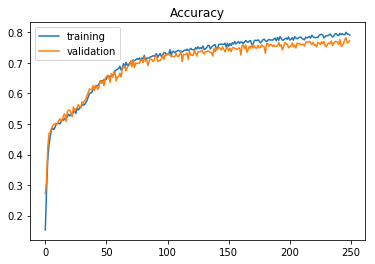

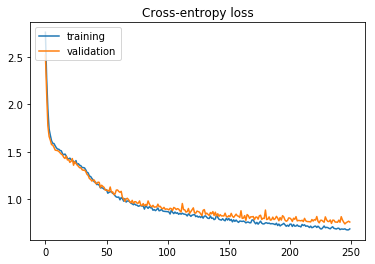

In [104]:
plot_accuracies_and_losses(history_6_l2_RGBN)

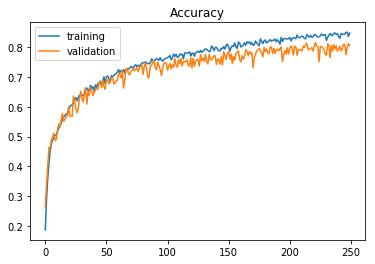

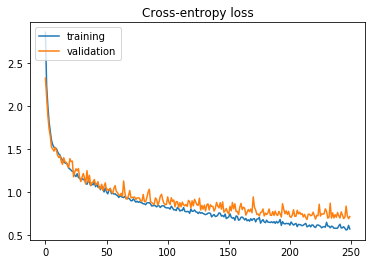

In [77]:
# adam lr =0.001
plot_accuracies_and_losses(history_6_l2_RGBN)

In [89]:
max(history_6_l2_RGBN.history['acc']),max(history_6_l2_RGBN.history['val_acc'])

(0.9519531, 0.8251953)

In [102]:
train_dataset_all = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
valid_dataset_all = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).repeat().batch(BATCH_SIZE)

In [103]:
train_dataset_all,valid_dataset_all

(<DatasetV1Adapter shapes: ((?, 32, 32, 10), (?, 17)), types: (tf.float32, tf.int32)>,
 <DatasetV1Adapter shapes: ((?, 32, 32, 10), (?, 17)), types: (tf.float32, tf.int32)>)

In [105]:
model_3_l2 = tf.keras.Sequential()
model_3_l2.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,10), kernel_regularizer = l2(0.001)))
model_3_l2.add(tf.keras.layers.MaxPooling2D((2,2)))
model_3_l2.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer = l2(0.001)))
model_3_l2.add(tf.keras.layers.MaxPooling2D((2,2)))
model_3_l2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer = l2(0.001)))

model_3_l2.add(tf.keras.layers.Flatten())
model_3_l2.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = l2(0.001)))
model_3_l2.add(tf.keras.layers.Dense(17, activation='softmax'))
model_3_l2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 30, 30, 16)        1456      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_20 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                65600     
__________

In [106]:
model_3_l2.compile(loss = 'categorical_crossentropy', optimizer = adam , metrics = ['accuracy'])
history_3_l2_all = model_3_l2.fit(train_dataset_all, epochs=250, steps_per_epoch=100,validation_data=valid_dataset_all,validation_steps=32)

Epoch 1/250
100/100 [==============================] - 10s 100ms/step - loss: 2.4089 - acc: 0.2798 - val_loss: 1.9216 - val_acc: 0.3950
Epoch 2/250
100/100 [==============================] - 1s 10ms/step - loss: 1.7376 - acc: 0.4316 - val_loss: 1.6366 - val_acc: 0.4812
Epoch 3/250
100/100 [==============================] - 1s 9ms/step - loss: 1.5690 - acc: 0.4939 - val_loss: 1.5765 - val_acc: 0.4912
Epoch 4/250
100/100 [==============================] - 1s 9ms/step - loss: 1.5168 - acc: 0.5156 - val_loss: 1.5172 - val_acc: 0.5210
Epoch 5/250
100/100 [==============================] - 1s 9ms/step - loss: 1.5072 - acc: 0.5145 - val_loss: 1.4885 - val_acc: 0.5156
Epoch 6/250
100/100 [==============================] - 1s 9ms/step - loss: 1.4806 - acc: 0.5263 - val_loss: 1.4854 - val_acc: 0.5120
Epoch 7/250
100/100 [==============================] - 1s 9ms/step - loss: 1.4488 - acc: 0.5381 - val_loss: 1.4696 - val_acc: 0.5310
Epoch 8/250
100/100 [==============================] - 1s 9ms/ste

100/100 [==============================] - 1s 10ms/step - loss: 1.1251 - acc: 0.6508 - val_loss: 1.1414 - val_acc: 0.6411
Epoch 63/250
100/100 [==============================] - 1s 10ms/step - loss: 1.1187 - acc: 0.6527 - val_loss: 1.1401 - val_acc: 0.6418
Epoch 64/250
100/100 [==============================] - 1s 10ms/step - loss: 1.1152 - acc: 0.6513 - val_loss: 1.1184 - val_acc: 0.6521
Epoch 65/250
100/100 [==============================] - 1s 10ms/step - loss: 1.1103 - acc: 0.6562 - val_loss: 1.1364 - val_acc: 0.6504
Epoch 66/250
100/100 [==============================] - 1s 9ms/step - loss: 1.1103 - acc: 0.6564 - val_loss: 1.1290 - val_acc: 0.6482
Epoch 67/250
100/100 [==============================] - 1s 10ms/step - loss: 1.0988 - acc: 0.6585 - val_loss: 1.1560 - val_acc: 0.6367
Epoch 68/250
100/100 [==============================] - 1s 10ms/step - loss: 1.1151 - acc: 0.6559 - val_loss: 1.1186 - val_acc: 0.6504
Epoch 69/250
100/100 [==============================] - 1s 9ms/step -

Epoch 123/250
100/100 [==============================] - 1s 9ms/step - loss: 0.9876 - acc: 0.7021 - val_loss: 1.0270 - val_acc: 0.6833
Epoch 124/250
100/100 [==============================] - 1s 9ms/step - loss: 0.9813 - acc: 0.7020 - val_loss: 1.0164 - val_acc: 0.6865
Epoch 125/250
100/100 [==============================] - 1s 9ms/step - loss: 0.9883 - acc: 0.6977 - val_loss: 1.0304 - val_acc: 0.6833
Epoch 126/250
100/100 [==============================] - 1s 9ms/step - loss: 0.9795 - acc: 0.7091 - val_loss: 1.0074 - val_acc: 0.6912
Epoch 127/250
100/100 [==============================] - 1s 9ms/step - loss: 1.0031 - acc: 0.6908 - val_loss: 1.0161 - val_acc: 0.6917
Epoch 128/250
100/100 [==============================] - 1s 10ms/step - loss: 0.9837 - acc: 0.7016 - val_loss: 1.0320 - val_acc: 0.6829
Epoch 129/250
100/100 [==============================] - 1s 9ms/step - loss: 0.9698 - acc: 0.7047 - val_loss: 1.0232 - val_acc: 0.6887
Epoch 130/250
100/100 [==============================]

Epoch 244/250
100/100 [==============================] - 1s 9ms/step - loss: 0.8385 - acc: 0.7524 - val_loss: 0.8902 - val_acc: 0.7349
Epoch 245/250
100/100 [==============================] - 1s 9ms/step - loss: 0.8487 - acc: 0.7510 - val_loss: 0.9043 - val_acc: 0.7349
Epoch 246/250
100/100 [==============================] - 1s 10ms/step - loss: 0.8403 - acc: 0.7575 - val_loss: 0.8956 - val_acc: 0.7358
Epoch 247/250
100/100 [==============================] - 1s 10ms/step - loss: 0.8621 - acc: 0.7445 - val_loss: 0.9389 - val_acc: 0.7195
Epoch 248/250
100/100 [==============================] - 1s 9ms/step - loss: 0.8417 - acc: 0.7527 - val_loss: 0.9116 - val_acc: 0.7275
Epoch 249/250
100/100 [==============================] - 1s 9ms/step - loss: 0.8520 - acc: 0.7503 - val_loss: 0.9057 - val_acc: 0.7373
Epoch 250/250
100/100 [==============================] - 1s 9ms/step - loss: 0.8429 - acc: 0.7531 - val_loss: 0.8660 - val_acc: 0.7441
